# Analyse du Temps d'Écran

## Description du Projet

Ce projet vise à analyser un dataset sur le temps d'écran des enfants en fonction de différents facteurs tels que l'âge, le genre, le type de temps d'écran (éducatif, récréatif, total) et le type de jour (semaine ou week-end). L'objectif est de fournir une analyse exploratoire des données (EDA) pour identifier les tendances et les corrélations, puis d'interpréter les résultats pour en tirer des conclusions significatives.

> "L'ensemble de données utilisé dans cette analyse provient de la plateforme Kaggle. Retrouvez le dataset [ici](https://www.kaggle.com/datasets/ak0212/average-daily-screen-time-for-children)."


### Chargement des données

In [18]:
import pandas as pd

# Charger le fichier CSV dans un DataFrame
file_path = 'screen_time.csv'
data = pd.read_csv(file_path)
data = pd.DataFrame(data)

# Afficher les premières lignes du DataFrame
print(data.head())

   Age Gender Screen Time Type Day Type  Average Screen Time (hours)  \
0    5   Male      Educational  Weekday                         0.44   
1    5   Male     Recreational  Weekday                         1.11   
2    5   Male            Total  Weekday                         1.55   
3    5   Male      Educational  Weekend                         0.50   
4    5   Male     Recreational  Weekend                         1.44   

   Sample Size  
0          500  
1          500  
2          500  
3          500  
4          500  


### Exploration des données

In [19]:
# Vérifier les valeurs manquantes
missing_values = data.isnull().sum()
print("Valeurs manquantes par colonne :")
print(missing_values)

# Vérifier les doublons
duplicate_rows = data.duplicated().sum()
print("\nNombre de lignes dupliquées :", duplicate_rows)

# Vérifier les types de données
data_types = data.dtypes
print("\nTypes de données des colonnes :")
print(data_types)


Valeurs manquantes par colonne :
Age                            0
Gender                         0
Screen Time Type               0
Day Type                       0
Average Screen Time (hours)    0
Sample Size                    0
dtype: int64

Nombre de lignes dupliquées : 0

Types de données des colonnes :
Age                              int64
Gender                          object
Screen Time Type                object
Day Type                        object
Average Screen Time (hours)    float64
Sample Size                      int64
dtype: object


### Analyse Exploratoire des données

#### 1. Distribution du temps d'écran moyen

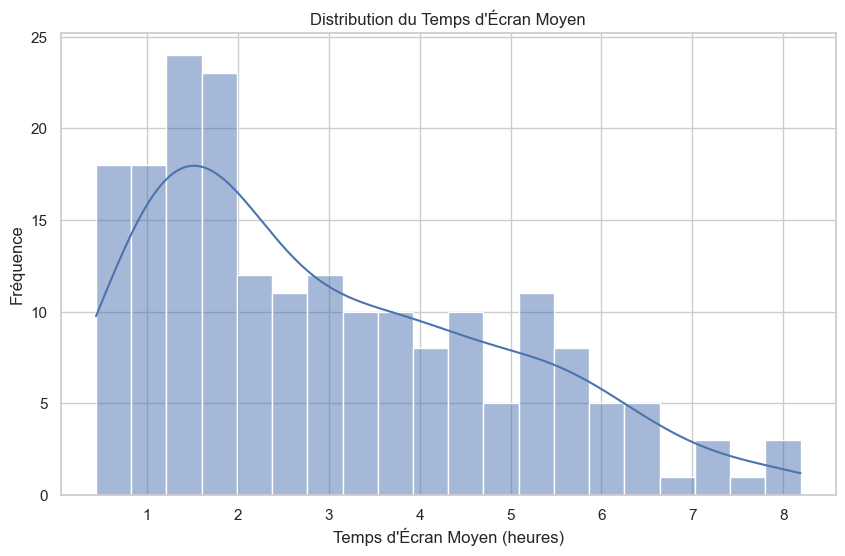

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurer le style de Seaborn
sns.set_theme(style="whitegrid")

# Visualiser la distribution du temps d'écran moyen
plt.figure(figsize=(10, 6))
sns.histplot(data['Average Screen Time (hours)'], bins=20, kde=True)
plt.title('Distribution du Temps d\'Écran Moyen')
plt.xlabel('Temps d\'Écran Moyen (heures)')
plt.ylabel('Fréquence')
plt.show()

Observations :

La distribution montre une concentration du temps d'écran moyen autour de certaines valeurs, avec une courbe de densité indiquant une légère asymétrie.

La majorité des participants ont un temps d'écran moyen compris entre 1 et 3 heures.

#### 2. Temps d'Écran Moyen par âge

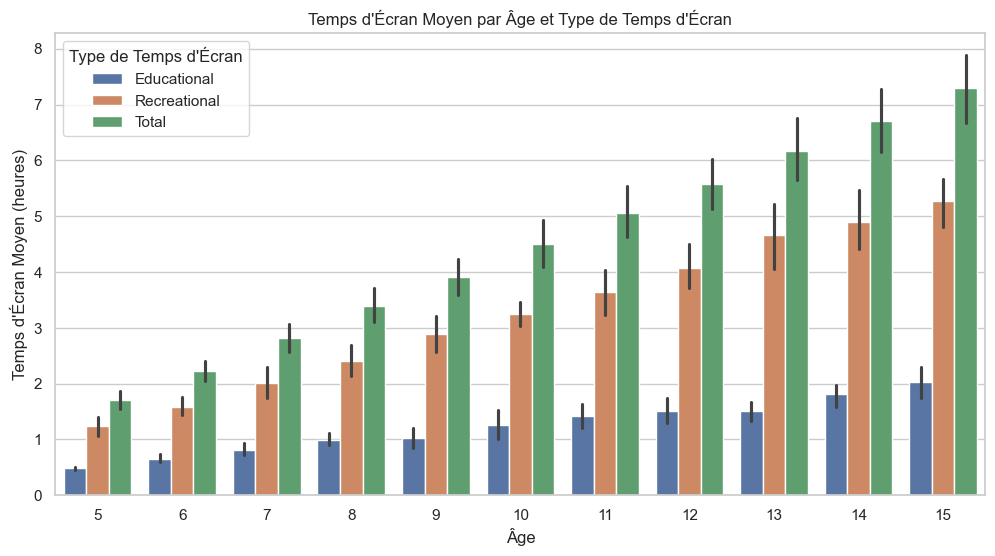

In [21]:
# Visualiser le temps d'écran moyen en fonction de l'âge
plt.figure(figsize=(12, 6))
sns.barplot(x='Age', y='Average Screen Time (hours)', hue='Screen Time Type', data=data)
plt.title('Temps d\'Écran Moyen par Âge et Type de Temps d\'Écran')
plt.xlabel('Âge')
plt.ylabel('Temps d\'Écran Moyen (heures)')
plt.legend(title='Type de Temps d\'Écran')
plt.show()

Le temps d'écran total augmente avec l'âge, en particulier pour le temps d'écran récréatif.

Les enfants plus âgés semblent passer plus de temps devant les écrans, ce qui pourrait être dû à un accès accru aux appareils électroniques.

#### 3. Temps d'écran moyen par genre

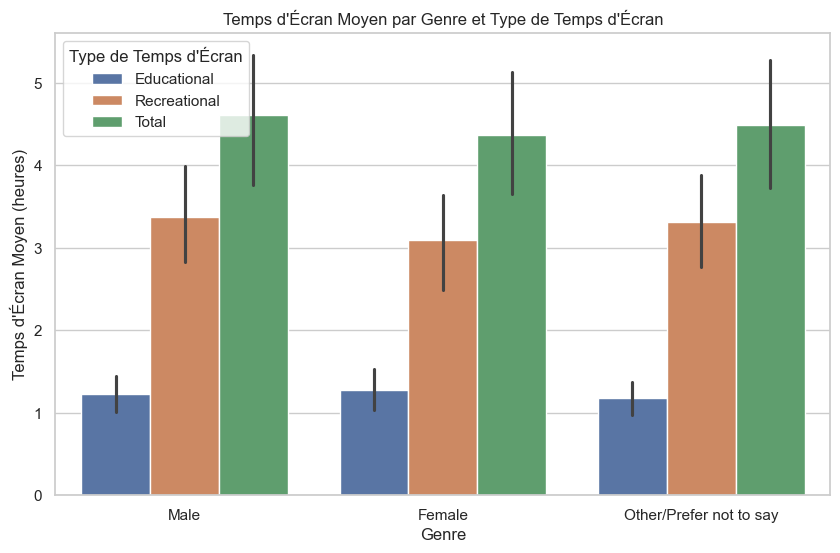

In [22]:
# Visualiser le temps d'écran moyen en fonction du genre
plt.figure(figsize=(10, 6))
sns.barplot(x='Gender', y='Average Screen Time (hours)', hue='Screen Time Type', data=data)
plt.title('Temps d\'Écran Moyen par Genre et Type de Temps d\'Écran')
plt.xlabel('Genre')
plt.ylabel('Temps d\'Écran Moyen (heures)')
plt.legend(title='Type de Temps d\'Écran')
plt.show()


Il n'y a pas de différence significative dans le temps d'écran total entre les garçons et les filles.

Cependant, les garçons semblent passer légèrement plus de temps devant des écrans récréatifs par rapport aux filles.

#### 4. Temps d'écran moyen par type de jour

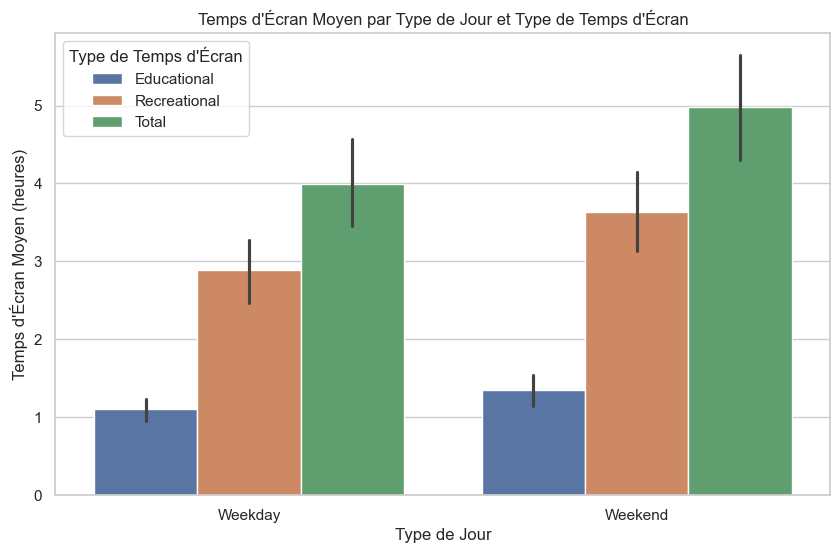

In [23]:
# Visualiser le temps d'écran moyen en fonction du type de jour
plt.figure(figsize=(10, 6))
sns.barplot(x='Day Type', y='Average Screen Time (hours)', hue='Screen Time Type', data=data)
plt.title('Temps d\'Écran Moyen par Type de Jour et Type de Temps d\'Écran')
plt.xlabel('Type de Jour')
plt.ylabel('Temps d\'Écran Moyen (heures)')
plt.legend(title='Type de Temps d\'Écran')
plt.show()

Le temps d'écran est généralement plus élevé pendant les week-ends, en particulier pour le temps d'écran récréatif.

Cela pourrait être dû au fait que les enfants ont plus de temps libre et moins d'activités structurées pendant les week-ends.

#### 5. Matrice de corrélation

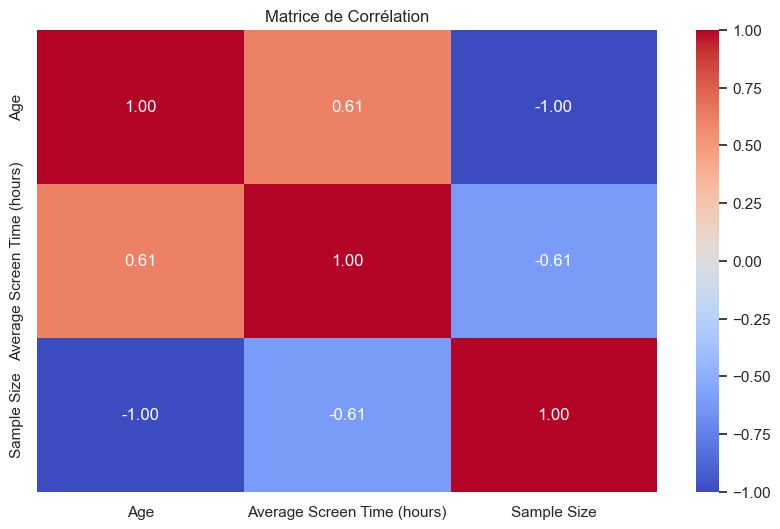

In [24]:
# Calculer la matrice de corrélation uniquement pour les colonnes numériques
numeric_data = data.select_dtypes(include='number')
correlation_matrix = numeric_data.corr()

# Visualiser la matrice de corrélation
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matrice de Corrélation')
plt.show()

Il n'y a pas de corrélations fortes entre les variables numériques, ce qui suggère que chaque variable contribue de manière indépendante au temps d'écran.

L'âge et le temps d'écran total montrent une légère corrélation positive, indiquant que le temps d'écran augmente avec l'âge.

### Interprétation des Résultats

**Tendances observées** : Le temps d'écran augmente avec l'âge et est plus élevé pendant les week-ends, en particulier pour les activités récréatives.

**Corrélations** : L'âge est légèrement corrélé avec le temps d'écran total, mais il n'y a pas de corrélations fortes avec d'autres variables.

**Implications** : Ces résultats suggèrent que des interventions ciblées pourraient être nécessaires pour gérer le temps d'écran, en particulier pendant les week-ends et pour les enfants plus âgés.

### Suggestions

**Éducation** : Informer les écoles sur les habitudes de temps d'écran des élèves pour développer des programmes éducatifs adaptés.

**Santé publique** : Utiliser ces données pour informer les campagnes de sensibilisation sur l'utilisation des appareils électroniques par les enfants.

**Parentalité** : Fournir des recommandations aux parents sur la gestion du temps d'écran de leurs enfants, en particulier pendant les week-ends.